In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
from qiskit.tools.monitor import job_monitor

In [5]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
# normal_fulladder which has input 0001
qc = QuantumCircuit(4,2)
qc.x(0)
qc.ccx(0, 1, 3)
qc.cx(0, 1)
qc.ccx(1, 2, 3)
qc.cx(1, 2)
qc.measure([2, 3], [1, 0])

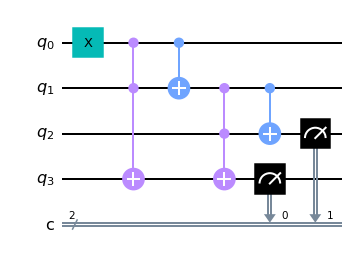

In [6]:
%matplotlib inline
qc.draw(output='mpl')

In [7]:
provider = IBMQ.get_provider(hub ='ibm-q-education', group='ibm-quantum-1', project='quantum-hackatho')
backend = provider.get_backend('ibm_perth')



Total count for 00 and 11 are: {'00': 477, '01': 444, '10': 2669, '11': 410}


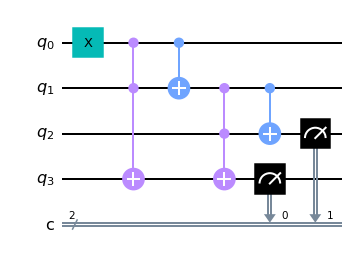

In [8]:
job = execute(qc, backend)
result = job.result()
counts = result.get_counts(qc)
print("\nTotal count for 00 and 11 are:",counts)
qc.draw()

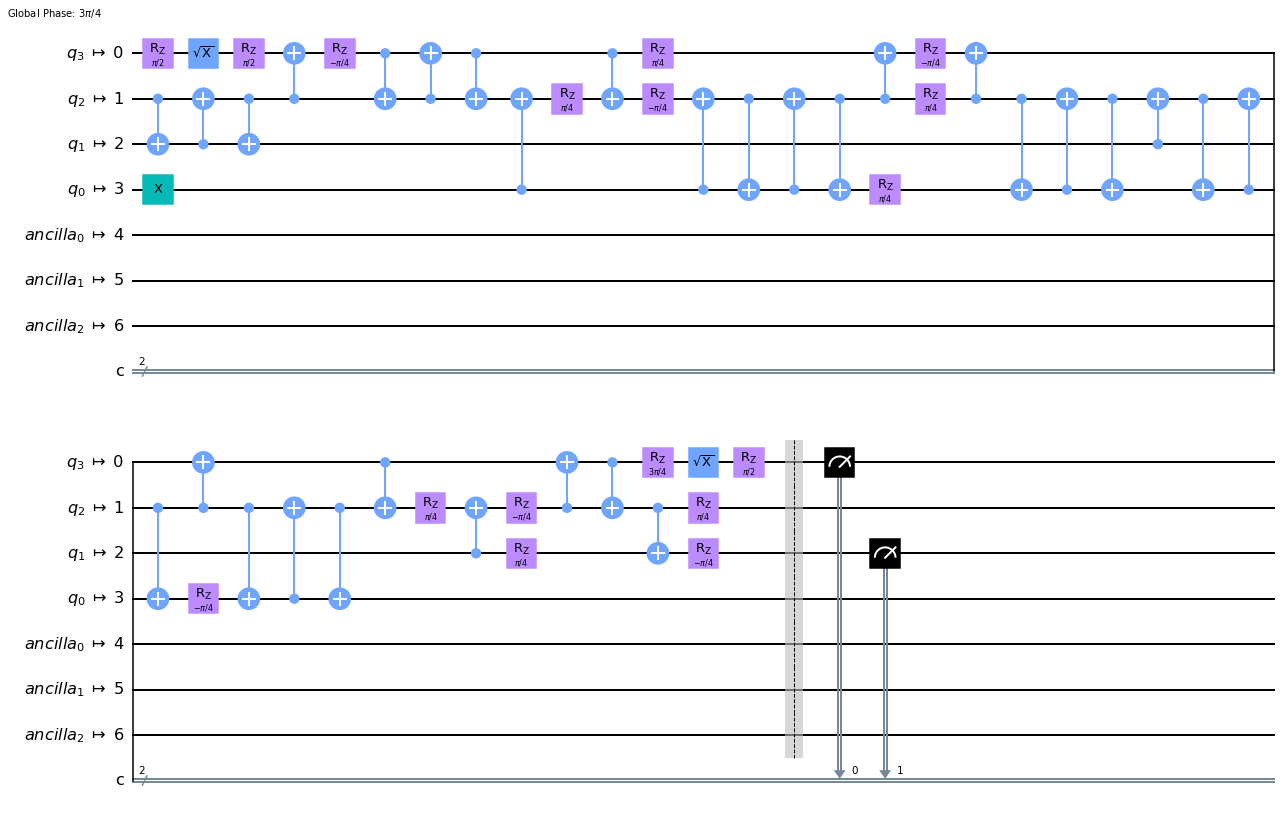

In [10]:
# transpiled normal_fulladder
re_transpile = transpile(qc, backend)
re_transpile.draw(output='mpl')

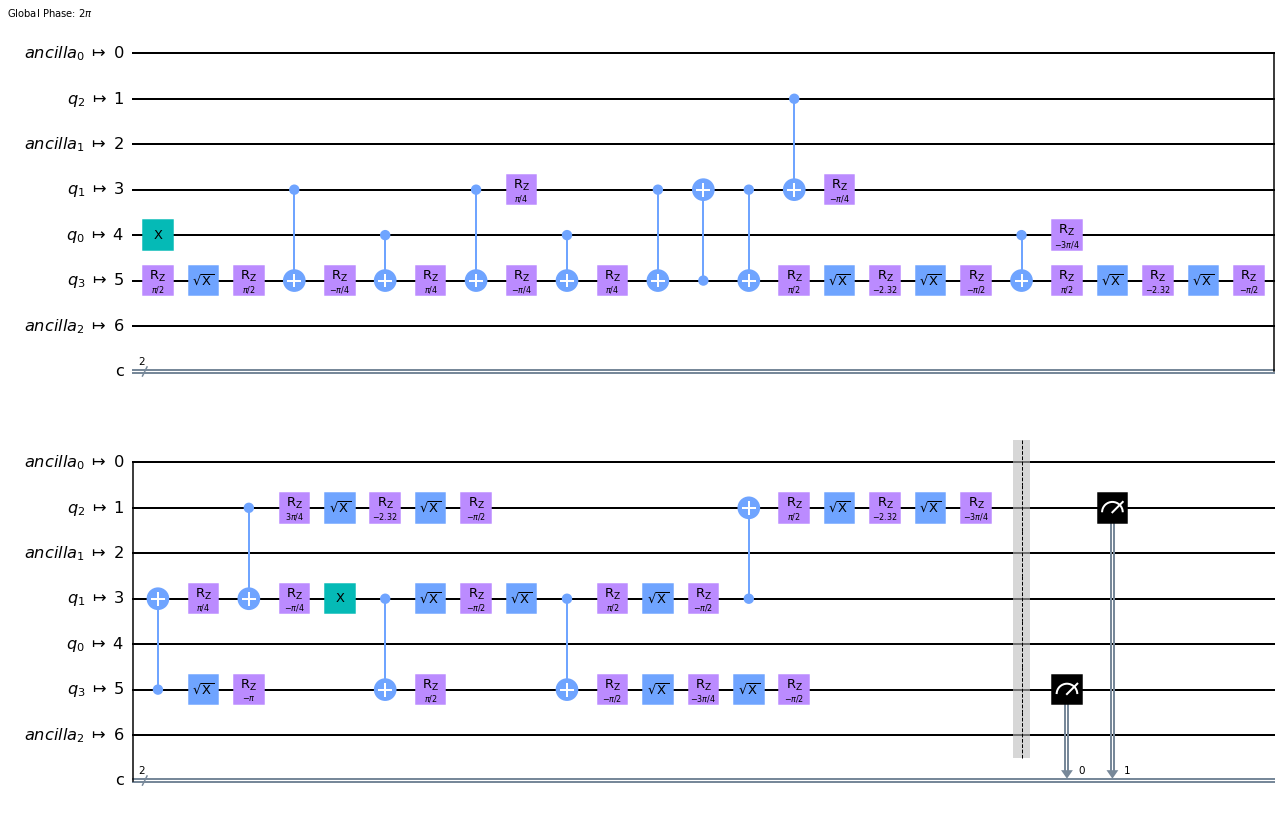

In [11]:
# transpiled normal_fulladder with optimization_level 3
re_transpile = transpile(qc, backend, optimization_level = 3)
re_transpile.draw(output='mpl')

In [12]:

job = execute(re_transpile, backend)
result = job.result()
counts = result.get_counts(re_transpile)
print("\nTotal count for 00 and 11 are:",counts)



Total count for 00 and 11 are: {'00': 301, '01': 274, '10': 3023, '11': 402}


In [16]:
#ccx in full_adder is replaced into ch-cz-ch gates
our_qc = QuantumCircuit(4,2)


our_qc.ch(0, 3)
our_qc.cz(1, 3)
our_qc.ch(0, 3)
our_qc.cx(0, 1)
our_qc.ch(1, 3)
our_qc.cz(2, 3)
our_qc.ch(1, 3)
our_qc.cx(1, 2)
our_qc.measure([2, 3], [1, 0])

In [25]:
job = execute(our_qc, backend)
result = job.result()
counts = result.get_counts(our_qc)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 2741, '01': 519, '10': 528, '11': 212}


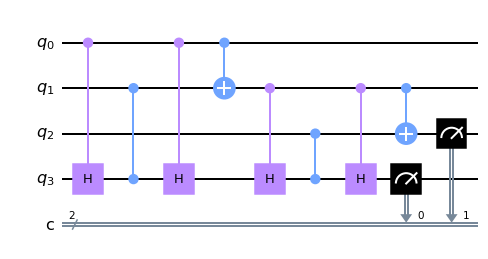

In [18]:
our_qc.draw(output='mpl')

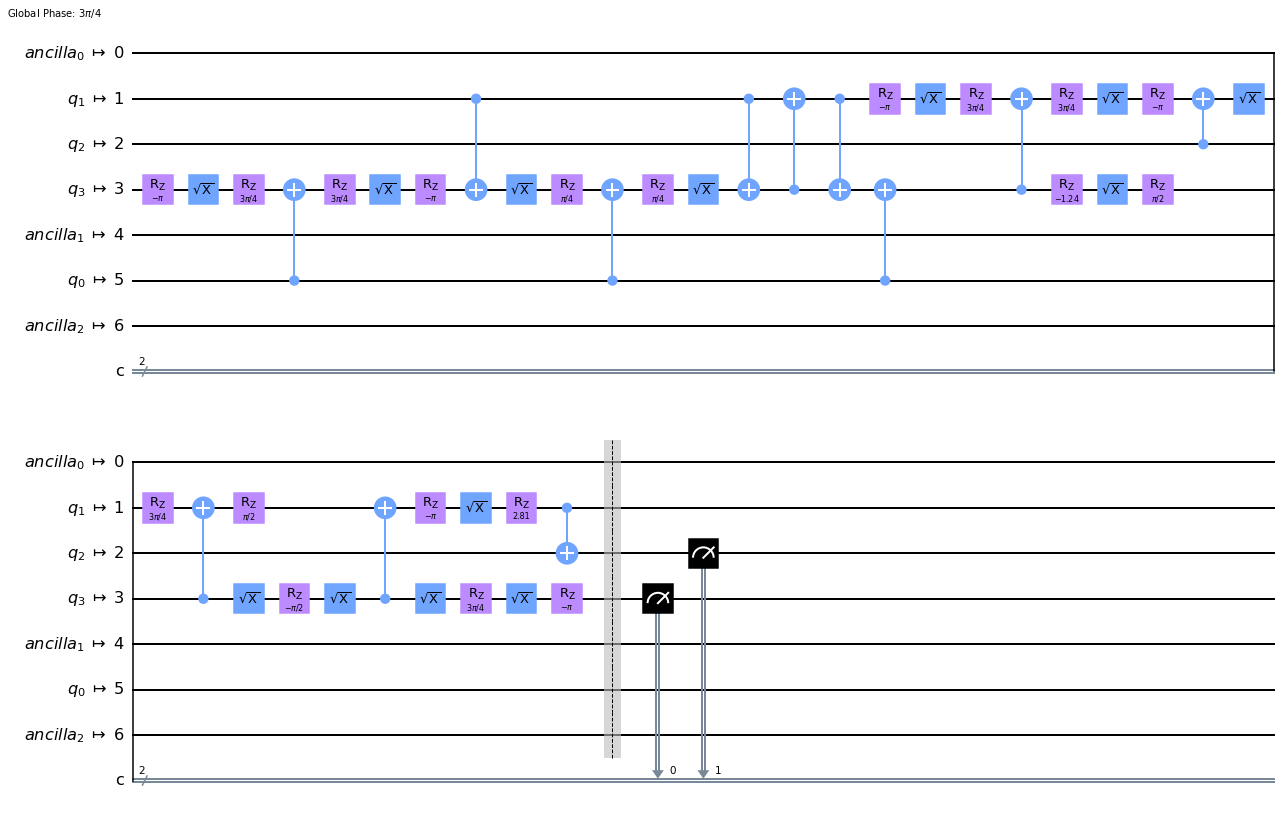

In [19]:
# transpiled full_adder which has ch-cz-ch
re_transpile = transpile(our_qc, backend, optimization_level = 3)
re_transpile.draw(output='mpl')


Total count for 00 and 11 are: {'00': 3173, '01': 298, '10': 388, '11': 141}


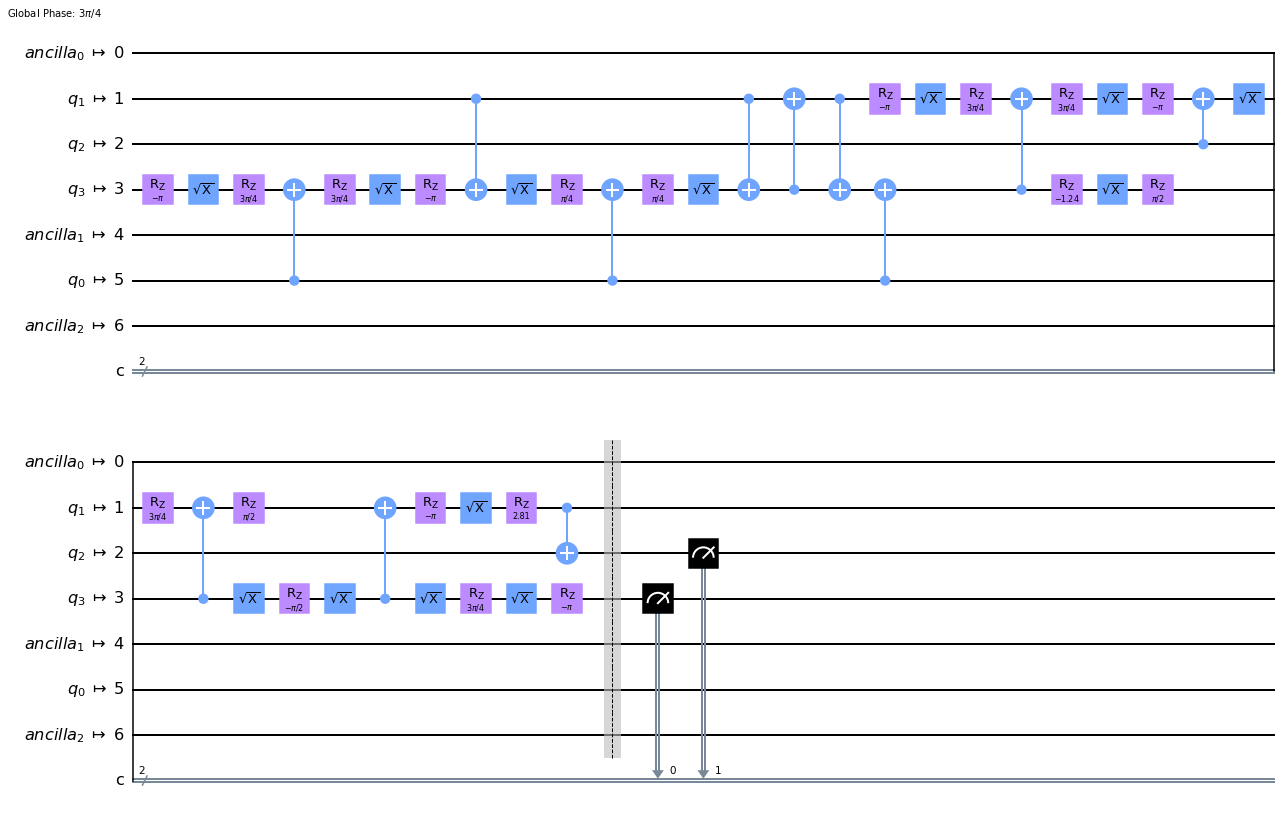

In [22]:
job = execute(re_transpile, backend)
result = job.result()
counts = result.get_counts(re_transpile)
print("\nTotal count for 00 and 11 are:",counts)
re_transpile.draw(output='mpl')